In [1]:
from sklearn.datasets import fetch_olivetti_faces
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, Dataset, TensorDataset, random_split
import torch.optim as optim
from tqdm import tqdm
import matplotlib.pyplot as plt

In [2]:
olivetti_faces = fetch_olivetti_faces(data_home='data/faces', shuffle=True)

In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [5]:
def draw_train_hist(hist):
    plt.figure(figsize=(8,5))
    plt.plot(hist, marker='o')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training Loss History')
    plt.grid(True)
    plt.show()

In [12]:
def train(model, epochs, optimizer, train_dataloader, test_dataloader):
    train_hist = []
    loss = nn.CrossEntropyLoss()
    for epoch in range(epochs):
        model.train()
        running_loss = 0.0
        for images, labels in tqdm(train_dataloader):
            images, labels = images.to(device), labels.to(device)
            optimizer.zero_grad()
            output = model(images.view(-1, 64*64))
            loss_val = loss(output, labels)
            loss_val.backward()
            optimizer.step()
            running_loss += loss_val.item() * images.size(0)
        train_hist.append(running_loss / len(train_dataloader.dataset))
        print(f'Epoch {epoch+1}, Loss: {train_hist[-1]}')
    
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for images, labels in test_dataloader:
                images, labels = images.to(device), labels.to(device)
                output = model(images.view(-1, 64*64))
                _, predicted = torch.max(output, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()
        print(f'Accuracy: {correct / total}')
    draw_train_hist(train_hist)

In [13]:
def prepare_data():
    images = torch.tensor(olivetti_faces.images, dtype=torch.float32)
    labels = torch.tensor(olivetti_faces.target, dtype=torch.int64)
    dataset = TensorDataset(images, labels)
    train_size = int(0.8 * len(dataset))
    test_size = len(dataset) - train_size
    train_dataset, test_dataset = random_split(dataset, [train_size, test_size])
    print(len(train_dataset), len(test_dataset))
    train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False)
    return train_dataloader, test_dataloader

320 80


100%|██████████| 10/10 [00:00<00:00, 28.10it/s]


Epoch 1, Loss: 3.621510910987854
Accuracy: 0.0375


100%|██████████| 10/10 [00:00<00:00, 28.43it/s]


Epoch 2, Loss: 3.1487411975860597
Accuracy: 0.1625


100%|██████████| 10/10 [00:00<00:00, 28.18it/s]


Epoch 3, Loss: 2.749457597732544
Accuracy: 0.3125


100%|██████████| 10/10 [00:00<00:00, 28.02it/s]


Epoch 4, Loss: 2.3900166749954224
Accuracy: 0.575


100%|██████████| 10/10 [00:00<00:00, 28.14it/s]


Epoch 5, Loss: 2.0794599890708922
Accuracy: 0.65


100%|██████████| 10/10 [00:00<00:00, 28.01it/s]


Epoch 6, Loss: 1.7945621490478516
Accuracy: 0.7375


100%|██████████| 10/10 [00:00<00:00, 28.06it/s]


Epoch 7, Loss: 1.6067043900489808
Accuracy: 0.7625


100%|██████████| 10/10 [00:00<00:00, 28.31it/s]


Epoch 8, Loss: 1.4054164052009583
Accuracy: 0.7875


100%|██████████| 10/10 [00:00<00:00, 28.15it/s]


Epoch 9, Loss: 1.246077024936676
Accuracy: 0.8


100%|██████████| 10/10 [00:00<00:00, 28.01it/s]


Epoch 10, Loss: 1.1177289068698884
Accuracy: 0.8125


100%|██████████| 10/10 [00:00<00:00, 25.65it/s]


Epoch 11, Loss: 1.0089094400405885
Accuracy: 0.8375


100%|██████████| 10/10 [00:00<00:00, 28.03it/s]


Epoch 12, Loss: 0.8808565080165863
Accuracy: 0.825


100%|██████████| 10/10 [00:00<00:00, 28.38it/s]


Epoch 13, Loss: 0.8224107384681701
Accuracy: 0.825


100%|██████████| 10/10 [00:00<00:00, 28.26it/s]


Epoch 14, Loss: 0.735171240568161
Accuracy: 0.8375


100%|██████████| 10/10 [00:00<00:00, 28.28it/s]


Epoch 15, Loss: 0.6811970293521881
Accuracy: 0.8375


100%|██████████| 10/10 [00:00<00:00, 28.41it/s]


Epoch 16, Loss: 0.6358975678682327
Accuracy: 0.8625


100%|██████████| 10/10 [00:00<00:00, 28.20it/s]


Epoch 17, Loss: 0.5522903114557266
Accuracy: 0.8625


100%|██████████| 10/10 [00:00<00:00, 27.88it/s]


Epoch 18, Loss: 0.5113331139087677
Accuracy: 0.8625


100%|██████████| 10/10 [00:00<00:00, 28.37it/s]


Epoch 19, Loss: 0.4980138689279556
Accuracy: 0.9


100%|██████████| 10/10 [00:00<00:00, 28.06it/s]


Epoch 20, Loss: 0.46333701014518736
Accuracy: 0.9


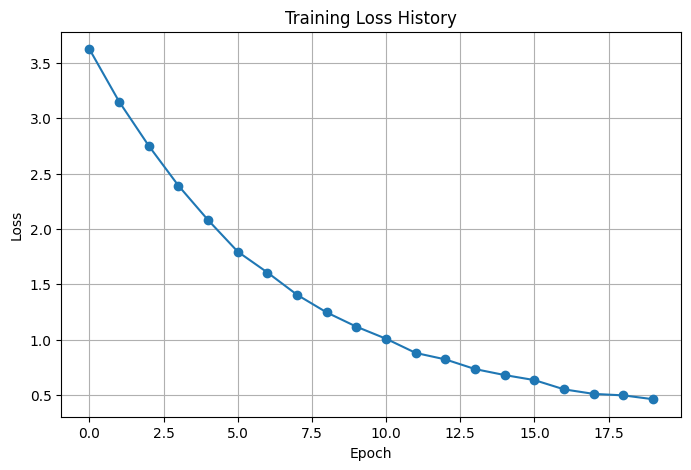

In [16]:
# test model with regularization and normalization
train_dataloader, test_dataloader = prepare_data()
model = nn.Sequential(
    nn.Linear(64*64, 8192),
    nn.BatchNorm1d(8192),
    nn.ReLU(),
    nn.Linear(8192, 8192*2),
    nn.BatchNorm1d(8192*2),
    nn.ReLU(),
    nn.Dropout(),
    nn.Linear(8192*2,8192),
    nn.BatchNorm1d(8192), 
    nn.ReLU(),
    nn.Linear(8192, 40)
).to(device)
optimizer = optim.SGD(model.parameters(), lr=0.001)
train(model, epochs=20, optimizer=optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader) 

320 80


100%|██████████| 10/10 [00:00<00:00, 27.13it/s]


Epoch 1, Loss: 3.6899417877197265
Accuracy: 0.025


100%|██████████| 10/10 [00:00<00:00, 28.35it/s]


Epoch 2, Loss: 3.6888325929641725
Accuracy: 0.025


100%|██████████| 10/10 [00:00<00:00, 28.53it/s]


Epoch 3, Loss: 3.6877989530563355
Accuracy: 0.025


100%|██████████| 10/10 [00:00<00:00, 28.92it/s]


Epoch 4, Loss: 3.6867539167404173
Accuracy: 0.025


100%|██████████| 10/10 [00:00<00:00, 29.05it/s]


Epoch 5, Loss: 3.6857187271118166
Accuracy: 0.025


100%|██████████| 10/10 [00:00<00:00, 28.72it/s]


Epoch 6, Loss: 3.684669828414917
Accuracy: 0.025


100%|██████████| 10/10 [00:00<00:00, 27.18it/s]


Epoch 7, Loss: 3.683902049064636
Accuracy: 0.025


100%|██████████| 10/10 [00:00<00:00, 28.40it/s]


Epoch 8, Loss: 3.6829335927963256
Accuracy: 0.025


100%|██████████| 10/10 [00:00<00:00, 28.33it/s]


Epoch 9, Loss: 3.681920027732849
Accuracy: 0.0125


100%|██████████| 10/10 [00:00<00:00, 28.52it/s]


Epoch 10, Loss: 3.681012678146362
Accuracy: 0.0125


100%|██████████| 10/10 [00:00<00:00, 28.11it/s]


Epoch 11, Loss: 3.680101728439331
Accuracy: 0.0


100%|██████████| 10/10 [00:00<00:00, 28.53it/s]


Epoch 12, Loss: 3.6793542861938477
Accuracy: 0.0


100%|██████████| 10/10 [00:00<00:00, 28.59it/s]


Epoch 13, Loss: 3.678465986251831
Accuracy: 0.0


100%|██████████| 10/10 [00:00<00:00, 28.28it/s]


Epoch 14, Loss: 3.677566933631897
Accuracy: 0.0


100%|██████████| 10/10 [00:00<00:00, 28.46it/s]


Epoch 15, Loss: 3.676752495765686
Accuracy: 0.0


100%|██████████| 10/10 [00:00<00:00, 28.71it/s]


Epoch 16, Loss: 3.6760222911834717
Accuracy: 0.0


100%|██████████| 10/10 [00:00<00:00, 28.53it/s]


Epoch 17, Loss: 3.6750919818878174
Accuracy: 0.0


100%|██████████| 10/10 [00:00<00:00, 26.62it/s]


Epoch 18, Loss: 3.674350547790527
Accuracy: 0.0


100%|██████████| 10/10 [00:00<00:00, 28.11it/s]


Epoch 19, Loss: 3.6736090898513796
Accuracy: 0.0


100%|██████████| 10/10 [00:00<00:00, 28.33it/s]


Epoch 20, Loss: 3.6727877616882325
Accuracy: 0.0


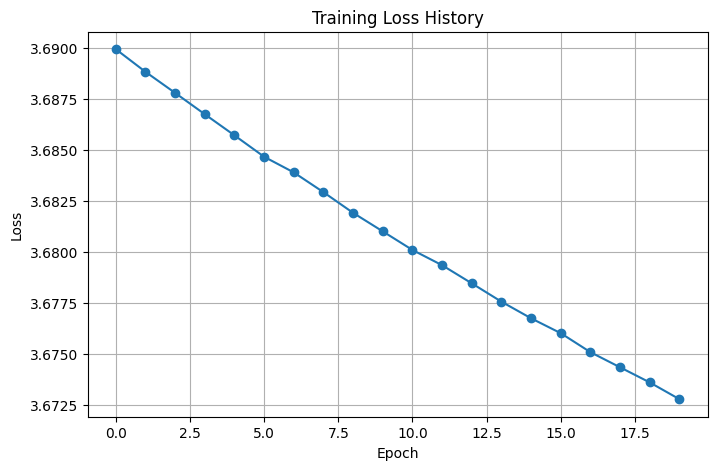

In [17]:
# test model without regularization and normalization
train_dataloader, test_dataloader = prepare_data()
model_wo = nn.Sequential(
    nn.Linear(64*64, 8192),
    nn.ReLU(),
    nn.Linear(8192, 8192*2),
    nn.ReLU(),
    nn.Linear(8192*2,8192),
    nn.ReLU(),
    nn.Linear(8192, 40)
).to(device)
optimizer = optim.SGD(model_wo.parameters(), lr=0.001)
train(model_wo, epochs=20, optimizer=optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader) 

320 80


100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


Epoch 1, Loss: 4.8143580734729765
Accuracy: 0.025


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


Epoch 2, Loss: 2.4314329504966734
Accuracy: 0.0875


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


Epoch 3, Loss: 1.1190973490476608
Accuracy: 0.1


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


Epoch 4, Loss: 0.6752243578433991
Accuracy: 0.175


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


Epoch 5, Loss: 0.3854119539260864
Accuracy: 0.275


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


Epoch 6, Loss: 0.3392381016165018
Accuracy: 0.6125


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


Epoch 7, Loss: 0.08018882963806391
Accuracy: 0.4375


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


Epoch 8, Loss: 0.10369043089449406
Accuracy: 0.8625


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


Epoch 9, Loss: 0.21117549408227204
Accuracy: 0.875


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


Epoch 10, Loss: 0.22919695675373078
Accuracy: 0.7875


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


Epoch 11, Loss: 0.1878642095718533
Accuracy: 0.4875


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


Epoch 12, Loss: 0.07452072277665138
Accuracy: 0.275


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


Epoch 13, Loss: 0.14254232924431562
Accuracy: 0.35


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


Epoch 14, Loss: 0.13351940035354345
Accuracy: 0.6875


100%|██████████| 10/10 [00:08<00:00,  1.20it/s]


Epoch 15, Loss: 0.16400856468826533
Accuracy: 0.725


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


Epoch 16, Loss: 0.052838661288842556
Accuracy: 0.275


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


Epoch 17, Loss: 0.14019494699314236
Accuracy: 0.225


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


Epoch 18, Loss: 0.0951411910704337
Accuracy: 0.5


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


Epoch 19, Loss: 0.28017008481547234
Accuracy: 0.2375


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]

Epoch 20, Loss: 0.2703370573464781
Accuracy: 0.3125


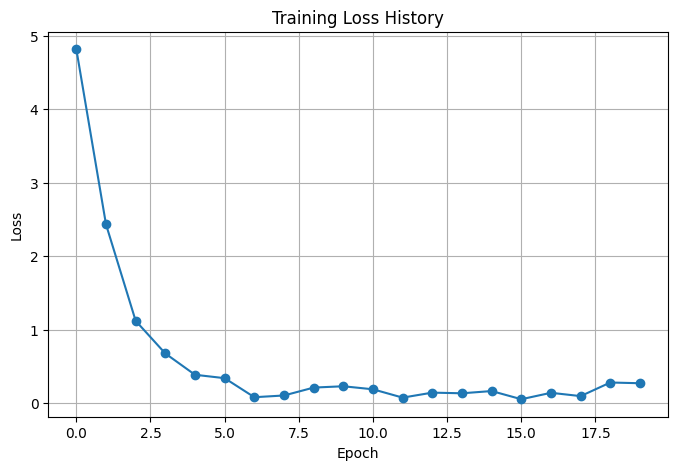

In [18]:
# test different optimizers --> adam
train_dataloader, test_dataloader = prepare_data()
optimizer = optim.Adam(model.parameters(), lr=0.001)
train(model, epochs=20, optimizer=optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader) 

320 80


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


Epoch 1, Loss: 0.7284103408455849
Accuracy: 0.0625


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


Epoch 2, Loss: 0.943648700043559
Accuracy: 0.3375


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


Epoch 3, Loss: 0.4083528287708759
Accuracy: 0.5375


100%|██████████| 10/10 [00:08<00:00,  1.21it/s]


Epoch 4, Loss: 0.40613294541835787
Accuracy: 0.375


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


Epoch 5, Loss: 0.31754026813432573
Accuracy: 0.6375


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


Epoch 6, Loss: 0.2867817958671367
Accuracy: 0.65


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


Epoch 7, Loss: 0.1393837512616301
Accuracy: 0.725


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


Epoch 8, Loss: 0.08740723765222355
Accuracy: 0.8625


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


Epoch 9, Loss: 0.12916190022369847
Accuracy: 0.7625


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


Epoch 10, Loss: 0.23320762402872788
Accuracy: 0.525


100%|██████████| 10/10 [00:08<00:00,  1.19it/s]


Epoch 11, Loss: 0.06435883058002219
Accuracy: 0.5375


100%|██████████| 10/10 [00:08<00:00,  1.16it/s]


Epoch 12, Loss: 0.18565183877944946
Accuracy: 0.4875


100%|██████████| 10/10 [00:08<00:00,  1.17it/s]


Epoch 13, Loss: 0.214242250577081
Accuracy: 0.4375


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


Epoch 14, Loss: 0.11399814297910779
Accuracy: 0.6875


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


Epoch 15, Loss: 0.3831909903441556
Accuracy: 0.5875


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


Epoch 16, Loss: 0.19635135717326194
Accuracy: 0.6875


100%|██████████| 10/10 [00:08<00:00,  1.15it/s]


Epoch 17, Loss: 0.21287567759864032
Accuracy: 0.3125


100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


Epoch 18, Loss: 0.41064561074163064
Accuracy: 0.3875


100%|██████████| 10/10 [00:08<00:00,  1.14it/s]


Epoch 19, Loss: 0.09406144976383075
Accuracy: 0.475


100%|██████████| 10/10 [00:09<00:00,  1.01it/s]

Epoch 20, Loss: 0.1605384408205282
Accuracy: 0.65


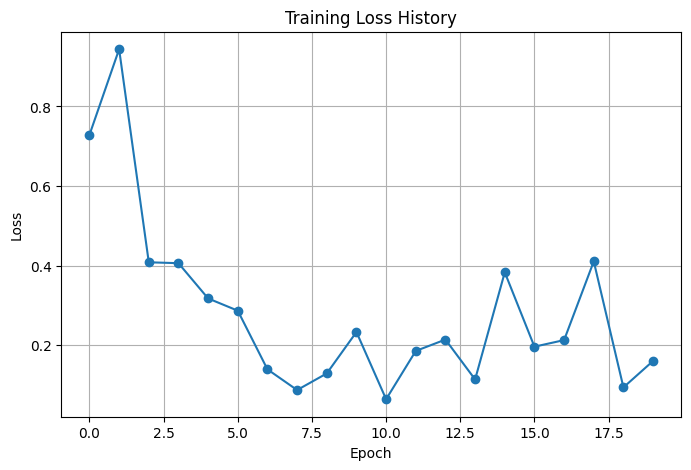

In [19]:
# test different optimizers --> adamW
train_dataloader, test_dataloader = prepare_data()
optimizer = optim.AdamW(model.parameters(), lr=0.001, weight_decay=0.01)
train(model, epochs=20, optimizer=optimizer, train_dataloader=train_dataloader, test_dataloader=test_dataloader) 